# >> library 가져오기

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt

In [2]:
import time
import random

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import seaborn as sns
sns.set()

In [6]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss

from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [7]:
from sklearn.model_selection import KFold, StratifiedKFold

# >> 데이터 불러오기

In [8]:
train = pd.read_csv("../data/dacon_galaxy/galaxy_train.csv", index_col=0)
test = pd.read_csv('../data/dacon_galaxy/galaxy_test.csv', index_col=0)
sample_submission = pd.read_csv('../data/dacon_galaxy/sample_submission.csv', index_col=0)

## type 타입 변환 (string obj >> integer)

In [9]:
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x: to_number(x, column_number))

In [10]:
train.head()

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type_num
id,,,,,,,,,,,,,,,,,,,,,
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,...,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340,8
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,...,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314,8
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,...,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928,8
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,...,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855,8
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,...,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,10


In [25]:
# train['isQSO'] = train['fiberID'].apply(lambda x: 1 if x >= 641 else 0)
# test['isQSO'] = test['fiberID'].apply(lambda x: 1 if x >= 641 else 0)

## Test fiberID >=641 데이터 Train에 붙이기

In [137]:
# test_concat = test[test['fiberID'] >= 641]
# test_concat.loc[:,'type'] = "QSO"
# train_test = pd.concat([train, test_concat])

In [140]:
# train_test = train_test[train.columns]

In [10]:
# train_test

# EDA

In [94]:
import seaborn as sns

In [108]:
train_2 = train.copy()
print(len(train_2))

199991


In [109]:
# filter selection---> Boolean Indexing 
train_2 = train_2[(train_2["psfMag_u"]>0) & (train_2["psfMag_u"]<100)]
print(len(train_2))

199945


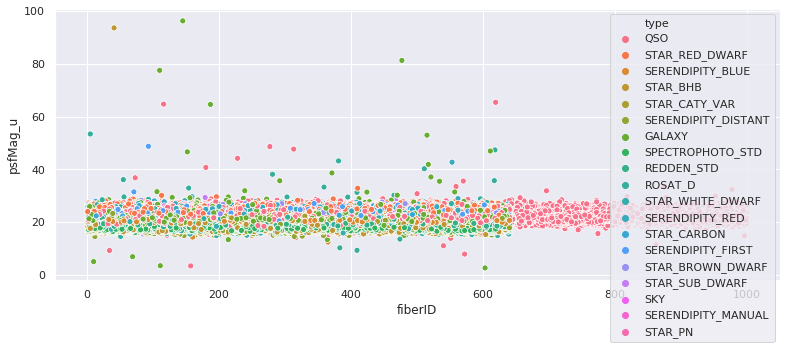

In [114]:
sns.scatterplot(x="fiberID", 
                y="psfMag_u", 
                hue="type",
                data=train_2)

## 결측치 확인

In [142]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200736 entries, 0 to 209998
Data columns (total 22 columns):
type          200736 non-null object
fiberID       200736 non-null int64
psfMag_u      200736 non-null float64
psfMag_g      200736 non-null float64
psfMag_r      200736 non-null float64
psfMag_i      200736 non-null float64
psfMag_z      200736 non-null float64
fiberMag_u    200736 non-null float64
fiberMag_g    200736 non-null float64
fiberMag_r    200736 non-null float64
fiberMag_i    200736 non-null float64
fiberMag_z    200736 non-null float64
petroMag_u    200736 non-null float64
petroMag_g    200736 non-null float64
petroMag_r    200736 non-null float64
petroMag_i    200736 non-null float64
petroMag_z    200736 non-null float64
modelMag_u    200736 non-null float64
modelMag_g    200736 non-null float64
modelMag_r    200736 non-null float64
modelMag_i    200736 non-null float64
modelMag_z    200736 non-null float64
dtypes: float64(20), int64(1), object(1)
memory usage: 3

# >> Outlier 제거

- test 기준에 맞춰보자

In [76]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = (13,5)

<Figure size 936x360 with 0 Axes>

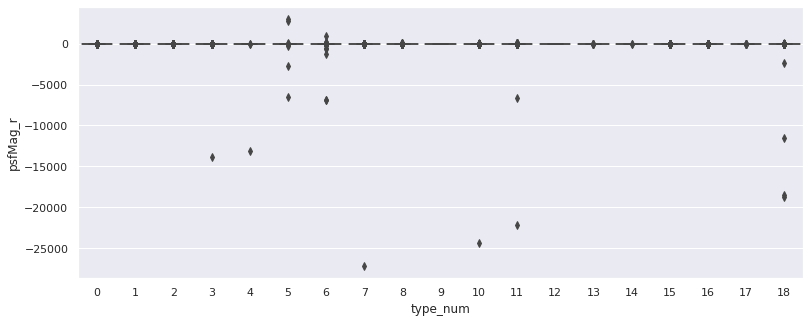

In [31]:
sns.boxplot('type_num', 'psfMag_r', data=train)

In [37]:
train.head()

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type_num
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,...,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340,8
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,...,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314,8
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,...,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928,8
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,...,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855,8
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,...,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,10


In [10]:
train.columns[2:-2]

Index(['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z',
       'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i', 'fiberMag_z',
       'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z',
       'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i'],
      dtype='object')

In [10]:
for column in train.columns[2:-1]:
    test_min_value = test[column].min()
    test_max_value = test[column].max()

    for column in train.columns[2:-1]:
        train = train.drop(index=train[(train[column] <= test_min_value-100) | (train[column] >= test_max_value+100)].index)

    train = train.reset_index(drop=True)
    
train.shape

(199880, 23)

In [150]:
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x: to_number(x, column_number))

In [144]:
# for column in train_test.columns[2:-1]:
#     train_test = train_test.drop(index=train_test[(train_test[column] < -100) | (train_test[column] > 100)].index)

# train_test = train_test.reset_index(drop=True)

### Outlier 제거 후

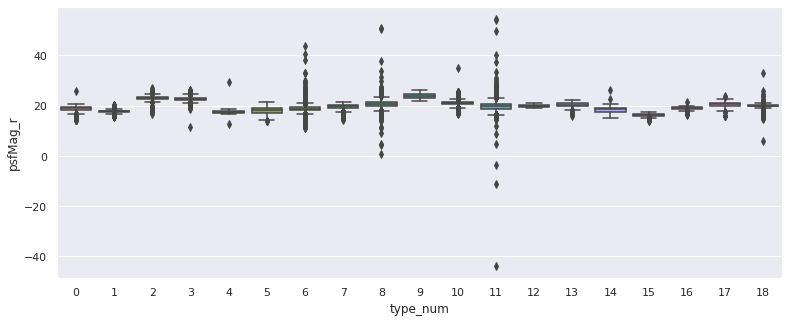

In [33]:
sns.boxplot('type_num', 'psfMag_r', data=train)

In [16]:
# train['isSKY'] = train['type'].apply(lambda x: 1 if x == 'SKY' else 0)
# train['isSeRed'] = train['type'].apply(lambda x: 1 if x == 'SERENDIPITY_RED' else 0)
# train['isQSO'] = train['type'].apply(lambda x: 1 if x == 'QSO' else 0)
# train['isWhiteDwarf'] = train['type'].apply(lambda x: 1 if x == 'STAR_WHITE_DWARF' else 0)
# train['isDesc'] = train['type'].apply(lambda x: 1 if x in ['SERENDIPITY_FIRST','SERENDIPITY_MANUAL','STAR_CATY_VAR','STAR_SUB_DWARF'] else 0)

# 각 Type의 데이터 개수 분포 확인

In [17]:
value_dist = train['type'].value_counts()

In [18]:
value_dist

QSO                    49666
GALAXY                 37312
SERENDIPITY_BLUE       21753
SPECTROPHOTO_STD       14629
REDDEN_STD             14616
STAR_RED_DWARF         13749
STAR_BHB               13493
SERENDIPITY_FIRST       7130
ROSAT_D                 6558
STAR_CATY_VAR           6506
SERENDIPITY_DISTANT     4653
STAR_CARBON             3256
SERENDIPITY_RED         2561
STAR_WHITE_DWARF        2160
STAR_SUB_DWARF          1154
STAR_BROWN_DWARF         500
SKY                      127
SERENDIPITY_MANUAL        61
STAR_PN                   13
Name: type, dtype: int64

<BarContainer object of 19 artists>

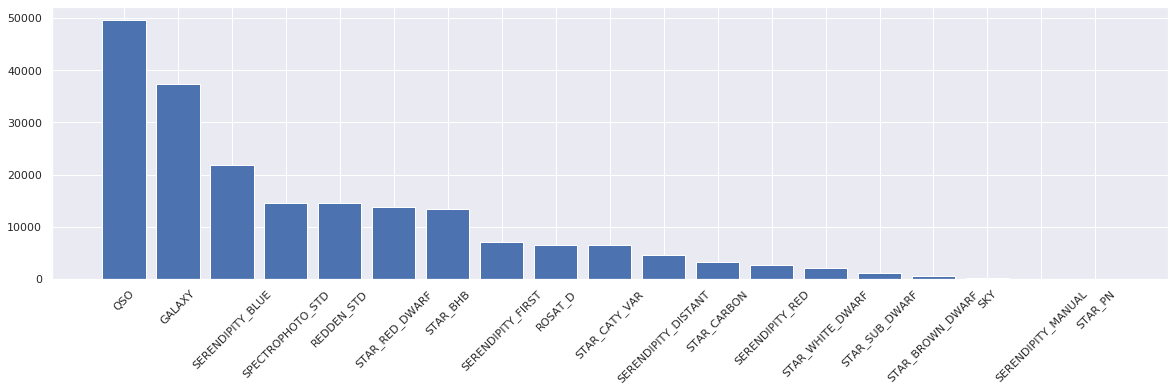

In [19]:
# 위의 type별 value_counts 도식화 표현
fig = plt.figure(figsize=(20, 5))
ax = plt.subplot(1, 1, 1)

for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)

ax.bar(value_dist.index, value_dist.values)

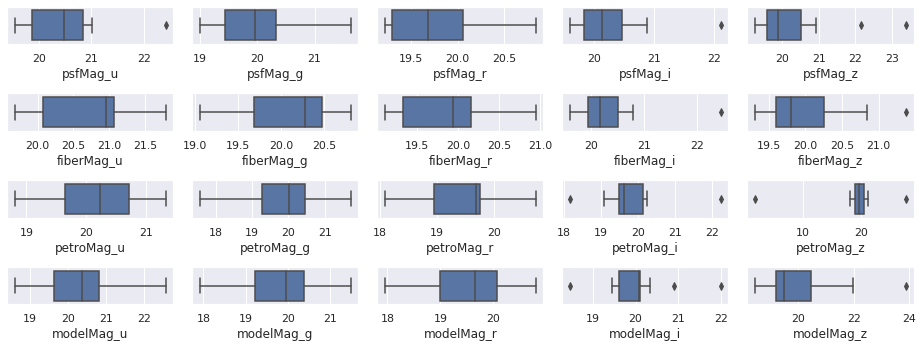

In [19]:
# 데이터 개수가 아주 적은 category의 칼럼별 수치 분포도 boxplot() 도식화
# 이 분포를 기준으로 random 난수 생성해서 데이터를 부풀려야할지는 나중에 정해야 함
fig, ax = plt.subplots(4,5)
idx_row = 0
for idx, column in enumerate(train.columns[2:-1]):
    sns.boxplot(train[train['type'] == 'STAR_PN'][column], ax=ax[idx_row,idx%5])
    if idx%5 == 4:
        idx_row += 1
    
fig.tight_layout()

## 데이터가 가장 많은 QSO를 기준으로 49000여개로 데이터를 맞추기 위한 함수
## 생략

In [21]:
# def equalTypeNumber(df):
#     dist_value = df['type'].value_counts()
#     type_list = dist_value.index
#     for idx, typeName in enumerate(type_list):
#         if idx == 0:
#             continue
        
#         # value_counts()의 결과를 토대로 데이터 개수가 가장 큰 QSO를 기준으로 한다.
#         # 나머지 type에 대해 
#         count = dist_value.values[0] % dist_value.values[idx]
#         random_idx = random.sample(list(np.arange(0,len(df[df['type'] == typeName]),1)), count)
#         sample_train = df.iloc[df[df['type'] == typeName].index[random_idx]]
        
#         duplicate = int(dist_value.values[0] / dist_value.values[idx])
#         temp = df[df['type'] == typeName]
        
#         for i in range(duplicate - 1):
#             tmp_idx1 = {original_idx : (new_idx + len(df)) for new_idx, original_idx in enumerate(temp.index)}
#             temp.rename(index=tmp_idx1, inplace=True)
#             df = df.append(temp)
        
#         tmp_idx2 = {original_idx : (new_idx + len(df)) for new_idx, original_idx in enumerate(sample_train.index)}
#         sample_train.rename(index=tmp_idx2, inplace=True)
#         df = df.append(sample_train)
        
#     return df

In [22]:
# train = equalTypeNumber(train)
# train

### 데이터 개수 동일화 결과 보기 - 생략

In [23]:
# value_dist = train['type'].value_counts()

In [24]:
# value_dist

In [25]:
# 동일화 한 이후로 그래프 표현

# fig = plt.figure(figsize=(20, 5))
# ax = plt.subplot(1, 1, 1)

# for label in ax.xaxis.get_ticklabels() :
#     label.set_rotation(45)

# ax.bar(value_dist.index, value_dist.values)

# Test Set 확인

## Test set 결측치 확인

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10009 entries, 199991 to 209999
Data columns (total 21 columns):
fiberID       10009 non-null int64
psfMag_u      10009 non-null float64
psfMag_g      10009 non-null float64
psfMag_r      10009 non-null float64
psfMag_i      10009 non-null float64
psfMag_z      10009 non-null float64
fiberMag_u    10009 non-null float64
fiberMag_g    10009 non-null float64
fiberMag_r    10009 non-null float64
fiberMag_i    10009 non-null float64
fiberMag_z    10009 non-null float64
petroMag_u    10009 non-null float64
petroMag_g    10009 non-null float64
petroMag_r    10009 non-null float64
petroMag_i    10009 non-null float64
petroMag_z    10009 non-null float64
modelMag_u    10009 non-null float64
modelMag_g    10009 non-null float64
modelMag_r    10009 non-null float64
modelMag_i    10009 non-null float64
modelMag_z    10009 non-null float64
dtypes: float64(20), int64(1)
memory usage: 1.7 MB


## Test Set boxplot 그래프로 데이터 분포 확인

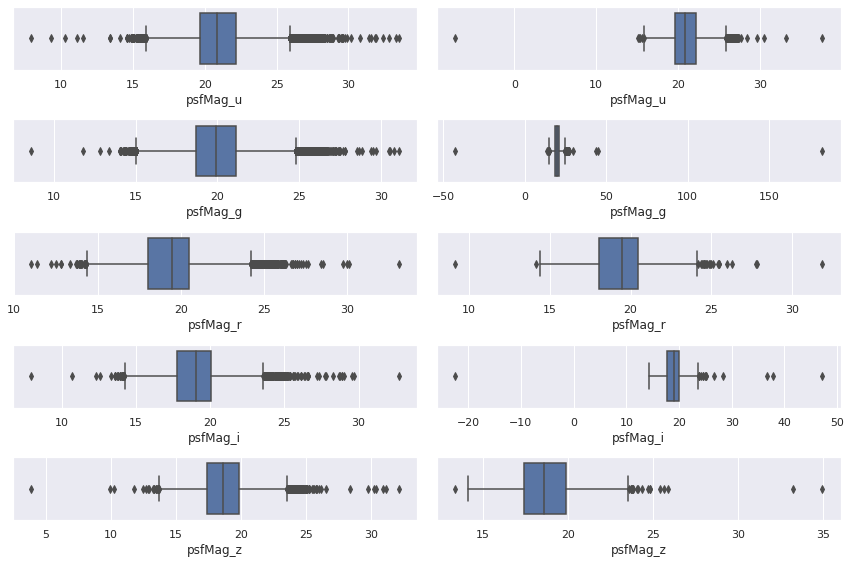

In [60]:
# 함수로 칼럼별 그래프 그리는 코드 구성하기
column_list = ['psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z']
fig, ax = plt.subplots(5,2, figsize=(12,8))
for idx, column in enumerate(column_list):
    sns.boxplot(train[column], ax=ax[idx,0])
    sns.boxplot(test[column], ax=ax[idx,1])
    
fig.tight_layout()

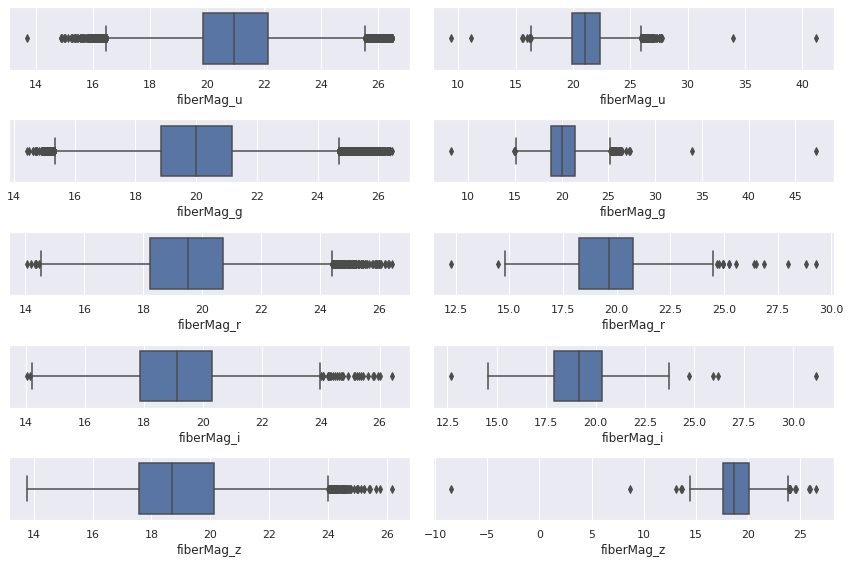

In [54]:
# 함수로 칼럼별 그래프 그리는 코드 구성하기
column_list = ['fiberMag_u','fiberMag_g','fiberMag_r','fiberMag_i','fiberMag_z']
fig, ax = plt.subplots(5,2, figsize=(12,8))
for idx, column in enumerate(column_list):
    sns.boxplot(train[column], ax=ax[idx,0])
    sns.boxplot(test[column], ax=ax[idx,1])
    
fig.tight_layout()

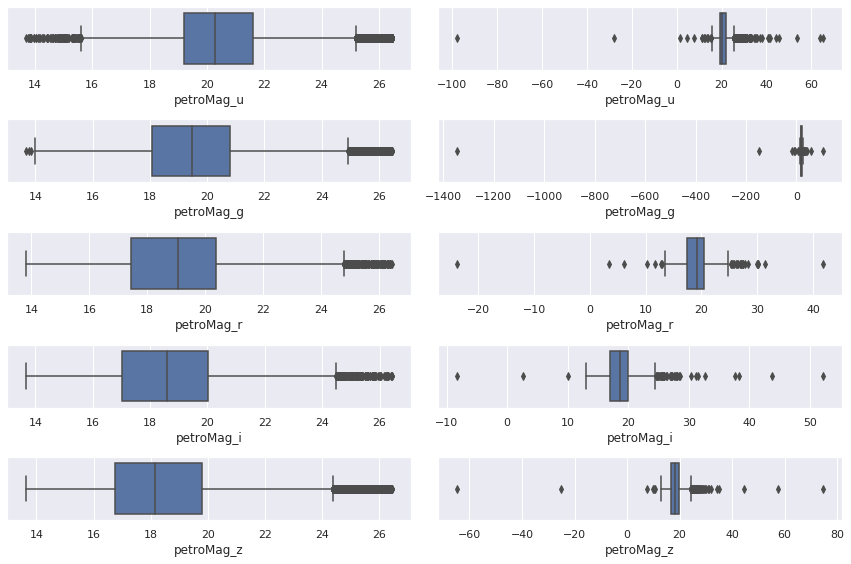

In [55]:
# 함수로 칼럼별 그래프 그리는 코드 구성하기
column_list = ['petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z']
fig, ax = plt.subplots(5,2, figsize=(12,8))
for idx, column in enumerate(column_list):
    sns.boxplot(train[column], ax=ax[idx,0])
    sns.boxplot(test[column], ax=ax[idx,1])
    
fig.tight_layout()

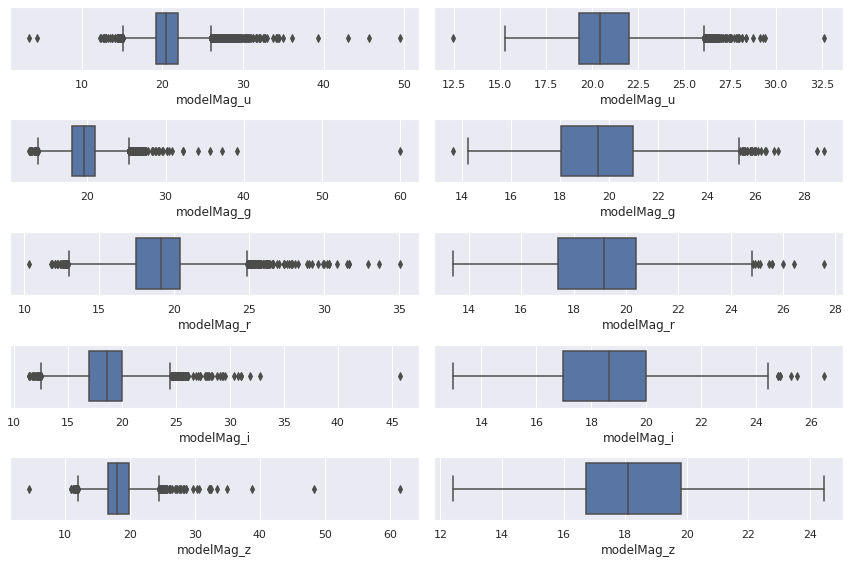

In [36]:
# 함수로 칼럼별 그래프 그리는 코드 구성하기
column_list = ['modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z']
fig, ax = plt.subplots(5,2, figsize=(12,8))
for idx, column in enumerate(column_list):
    sns.boxplot(train[column], ax=ax[idx,0])
    sns.boxplot(test[column], ax=ax[idx,1])
    
fig.tight_layout()

# >> Model 돌리기 전 준비

In [154]:
train.head()

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type_num,xgb_weight,cat_weight,light_weight
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,...,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340,8,21.127592,19.998895,19.795851
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,...,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314,8,20.430875,19.268012,19.158808
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,...,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928,8,16.598349,15.714487,15.606215
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,...,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855,8,19.609192,18.485342,18.368471
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,...,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,10,21.020033,20.187512,19.968629


In [11]:
# train set 정답지, 문제지 / test set 설정
train_X = train.drop(columns=['type', 'type_num'], axis=1)
train_y = train['type_num']
test_x = test

In [ ]:
# column_number = {}
# for i, column in enumerate(sample_submission.columns):
#     column_number[column] = i
    
# def to_number(x, dic):
#     return dic[x]

# train_test['type_num'] = train_test['type'].apply(lambda x: to_number(x, column_number))

In [149]:
# # train set 정답지, 문제지 / test set 설정
# train_X = train_test.drop(columns=['type', 'type_num'], axis=1)
# train_y = train_test['type_num']
# test_x = test

In [12]:
print(train_X.shape)
print(train_y.shape)
print(test_x.shape)

(199880, 21)
(199880,)
(10009, 21)


### Validation을 위한 train set split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(train_X, 
                                                    train_y, 
                                                    stratify = train_y,
                                                    test_size=0.2, 
                                                    random_state=1234)

### stratifiedKFold or KFold 사용 (데이터 정답지의 개수 분포를 보고 결정)

In [170]:
# kfold = KFold(n_splits=6, random_state= 0, shuffle = True)
kfold_s = StratifiedKFold(n_splits=7, random_state= 0, shuffle = True)

# >> Model 돌리기

### 모델 관련 library import

In [13]:
import xgboost as xgb
from xgboost import XGBClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import catboost as catb
from catboost import CatBoostClassifier
import lightgbm
from lightgbm import LGBMClassifier

In [ ]:
# K-Nearest Neighbors Model
# knn = KNeighborsClassifier(n_neighbors=20, weights='distance', n_jobs=-1)

In [ ]:
# Random Forest Model
# RF_cif = RandomForestClassifier(n_estimators=500, max_features=6, random_state=1234)

In [16]:
# LGB = LGBMClassifier(random_state =1234, n_jobs = -1)

In [ ]:
# LGBM parameter tuning
# LGB = LGBMClassifier(random_state =1234, 
#                      n_jobs = -1,
#                      devices='gpu')

# lb_param_grid = {
#     'learning_rate' : np.arange(0.1,0.15,0.01),
#     'num_iterations' : [200],
#     'max_bin' : [300],
#     'num_leaves':[90],
#     'max_depth' : [6,7,8],
#     'min_child_weight': [0.1],
#     'min_split_gain':[0.3]
#     'device_type'=['gpu']
#     'num_boost_round' : [1000]
#}

In [14]:
#XGboost Model
XGBC = XGBClassifier(tree_method='gpu_hist', gpu_id=0, random_state=1234)

In [168]:
#XGBoost parameter tuning

xgc_param_grid = {
    'n_estimators':[200] ,
    'learning_rate' : [0.1],
    #'eta': np.arange(0,0.3,0.1),
    #'min_child_weight' : np.arange(4,7,1),
    'max_depth' : [9]             
}

In [171]:
n_iter_search = 10
xgv = RandomizedSearchCV(XGBC, 
                         xgc_param_grid, 
                             cv=kfold_s,
                             n_jobs=-1,
                             random_state=1234,
                             scoring='neg_log_loss',
                            n_iter=n_iter_search)

In [172]:
xgv.fit(train_X, train_y, verbose=True)

/home/g21300602/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=7, random_state=0, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=0, learning_rate=0.1,
                                           max_delta_step=0, max_depth=3,
                                           min_child_weight=1, missing=None,
                                           n_estimators=100, n_jobs=1,
                                           nthr...
                                           random_state=1234, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
              

In [173]:
xgv.best_params_

{'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1}

In [174]:
xgv.best_score_

-0.36515120082735936

{'bagging_fraction': 0.5, 'feature_fraction': 0.1, 'lambda_l1': 0.1, 'lambda_l2': 0.2, 'max_depth': 4.0, 'min_child_weight': 0.1, 'min_split_gain': 0.3, 'num_leaves': 80.0}

- Randomized Search

In [ ]:
n_iter_search = 10
lgbm = RandomizedSearchCV(LGB, 
                         lb_param_grid, 
                             cv=kfold_s,
                             n_jobs=-1,
                             random_state=1234,
                             scoring='neg_log_loss',
                            n_iter=n_iter_search)
lgbm.fit(train_X, train_y)

/home/g21300602/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/g21300602/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/g21300602/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/g21300602/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/g21300602/anaconda

/home/g21300602/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/g21300602/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/g21300602/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/g21300602/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/g21300602/anaconda

In [19]:
lgbm.best_score_

-0.38997145350164925

In [20]:
lgbm.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               devices='gpu', importance_type='split', learning_rate=0.1,
               max_bin=300, max_depth=8, min_child_samples=20,
               min_child_weight=0.1, min_split_gain=0.3, n_estimators=100,
               n_jobs=-1, num_leaves=90, objective=None, random_state=1234,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [44]:
lgbm_best = lgbm.best_estimator_

In [ ]:
# LGB = LGBMClassifier(learning_rate=0.1, 
#                      num_iterations =200, 
#                      max_bin=300, 
#                      num_leaves =256, 
#                      boosting='dart',
#                      random_state=1234, 
#                      n_jobs = -1)

### Cross Validation

In [ ]:
log_loss = cross_val_score(RF_cif, X_train, y_train, cv=kfold_s, scoring='neg_log_loss')

# >> Validation을 통해 모델 성능 확인

In [46]:
# Test with Test Set
y_pred = lgbm_best.predict(X_test)

In [47]:
accuracy_score(y_test, y_pred)

0.9105257891840512

In [48]:
y_pred

array([[ 5],
       [15],
       [ 4],
       ...,
       [ 8],
       [11],
       [ 8]])

In [48]:
y_test

30667      5
103239    15
50562      4
129161     6
159805     5
          ..
195079    18
165249     8
183755    11
163341    11
196364     8
Name: type_num, Length: 39978, dtype: int64

- CatBoost 사용시 list로 변환해주어야 한다.

In [49]:
# catboost predict 결과가 이중 numpy.array형태로 되어있어서 
# 벗겨서 list로 만드는 작업
y_pred_list = []
for i in y_pred:
    y_pred_list.append(int(i))

- CatBoost 이외의 알고리즘은 변환해줄 필요 없다.

In [50]:
category = {}
for i, column in enumerate(sample_submission.columns):
    category[i] = column

In [51]:
# 글자 색상 결정
C_END = "\033[0m"
C_RED = "\033[31m"
C_BOLD = "\033[1m"

for cate in range(19):
    prob = sum(((y_test == cate) & (y_test == y_pred_list))) / sum(y_test == cate)
    if(prob < 0.85):
        print(C_BOLD + C_RED + "category"+ str(cate) +"\t"+ category[cate]+' : ' + str(prob) + C_END)
    else:
        print("category",cate,"\t"+ category[cate],':', prob)

category0	STAR_WHITE_DWARF : 0.6597222222222222
category 1 	STAR_CATY_VAR : 0.9684857801691007
category 2 	STAR_BROWN_DWARF : 0.88
category 3 	SERENDIPITY_RED : 0.94921875
category 4 	REDDEN_STD : 0.9798152582962709
category 5 	STAR_BHB : 0.8999629492404594
category 6 	GALAXY : 0.98900951615065
category7	SERENDIPITY_DISTANT : 0.7089151450053706
category 8 	QSO : 0.9097956307258633
category 9 	SKY : 0.96
category 10 	STAR_RED_DWARF : 0.9894545454545455
category11	ROSAT_D : 0.38443935926773454
category12	STAR_PN : 0.6666666666666666
category13	SERENDIPITY_FIRST : 0.67671809256662
category 14 	STAR_CARBON : 0.9846390168970814
category 15 	SPECTROPHOTO_STD : 0.9702665755297334
category 16 	STAR_SUB_DWARF : 0.9567099567099567
category17	SERENDIPITY_MANUAL : 0.8333333333333334
category 18 	SERENDIPITY_BLUE : 0.9161112387956791


In [27]:
train

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type_num
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,...,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340,8
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,...,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314,8
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,...,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928,8
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,...,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855,8
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,...,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199875,QSO,568,20.630780,20.437920,20.050756,20.020974,19.959646,20.948519,20.726709,20.311562,...,20.536338,20.126561,20.102815,19.796722,20.783295,20.326879,20.014046,20.061940,19.862513,8
199876,GALAXY,362,25.283695,22.807243,21.069792,20.187531,19.595598,26.677671,22.818723,20.786120,...,22.250489,20.091693,18.985791,18.803354,26.921903,21.952440,19.776321,18.990039,18.528306,6
199877,STAR_RED_DWARF,146,23.609826,21.902709,20.330747,18.457535,17.326771,24.320816,22.287946,20.711737,...,22.132993,20.329624,18.507337,17.418521,24.503460,21.897599,20.420524,18.443126,17.331724,10
199878,GALAXY,85,21.172003,20.561208,20.031754,19.793644,19.540471,21.704126,20.469748,19.872089,...,18.065559,17.501307,17.180639,17.175205,19.109086,18.004976,17.440331,17.193743,16.969854,6


In [17]:
xgb_feature = xgb_model.feature_importances_
cat_feature = catb_model.feature_importances_ / 100
lgbm_feature = lgbm_model.feature_importances_ / sum(lgbm_model.feature_importances_)

In [18]:
xgb_feature_importance = {}
cat_feature_importance = {}
lgbm_feature_importance = {}

for idx, column in enumerate(train.columns[1:-1]):
    xgb_feature_importance[column] = xgb_feature[idx]
    cat_feature_importance[column] = cat_feature[idx]
    lgbm_feature_importance[column] = lgbm_feature[idx]

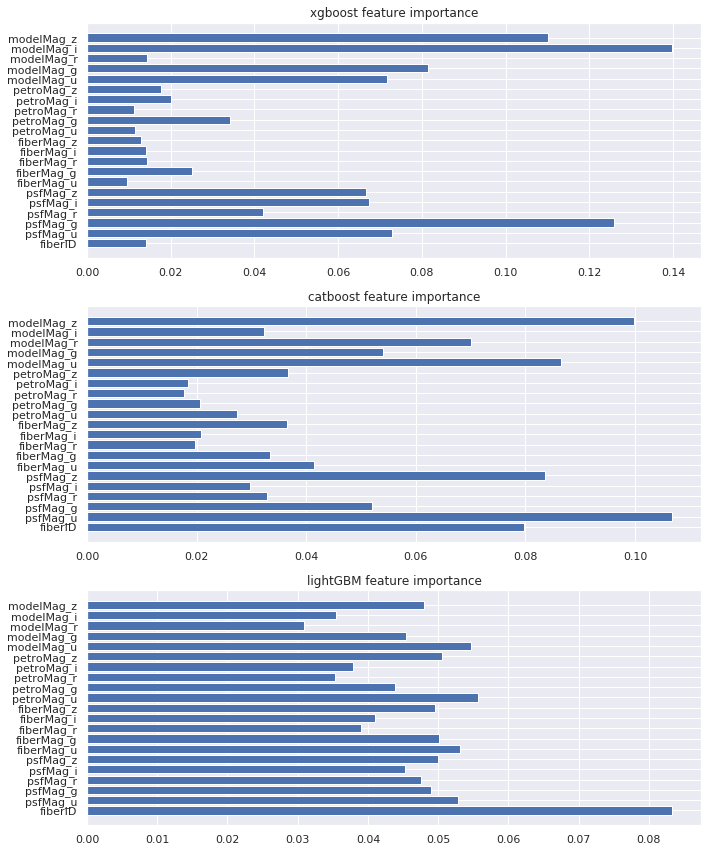

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,12))

ax1.barh(list(xgb_feature_importance.keys()), list(xgb_feature_importance.values()))
ax1.set(title='xgboost feature importance')

ax2.barh(list(cat_feature_importance.keys()), list(cat_feature_importance.values()))
ax2.set(title='catboost feature importance')

ax3.barh(list(lgbm_feature_importance.keys()), list(lgbm_feature_importance.values()))
ax3.set(title='lightGBM feature importance')

fig.tight_layout()
plt.show()

In [153]:
train['xgb_weight'] = train[train.columns[2:-1]].apply(lambda x : sum(np.array(x)*xgb_feature[1:]), axis=1)
train['cat_weight'] = train[train.columns[2:-2]].apply(lambda x : sum(np.array(x)*cat_feature[1:]), axis=1)
train['light_weight'] = train[train.columns[2:-3]].apply(lambda x : sum(np.array(x)*lgbm_feature[1:]), axis=1)

In [158]:
test['xgb_weight'] = test[test.columns[1:]].apply(lambda x : sum(np.array(x)*xgb_feature[1:]), axis=1)
test['cat_weight'] = test[test.columns[1:-1]].apply(lambda x : sum(np.array(x)*cat_feature[1:]), axis=1)
test['light_weight'] = test[test.columns[1:-2]].apply(lambda x : sum(np.array(x)*lgbm_feature[1:]), axis=1)

In [159]:
test

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,xgb_weight,cat_weight,light_weight
id,,,,,,,,,,,,,,,,,,,,,
199991,251,23.817399,22.508963,20.981106,18.517316,17.076079,25.053890,23.167848,21.335901,18.835858,...,18.584486,17.154284,25.391534,22.499435,21.011918,18.499341,17.091474,20.124594,19.254133,19.073271
199992,386,22.806983,21.937111,20.335770,20.000512,19.527369,22.498565,22.186000,20.618879,20.301204,...,19.967204,19.683671,22.475338,21.853442,20.173169,19.796757,19.567372,20.460507,19.326412,19.166452
199993,232,21.024250,19.235669,18.304061,17.808608,17.380113,21.205546,19.439533,18.344433,17.909690,...,17.158519,16.843986,20.579314,18.653338,17.562108,17.120529,16.708748,18.013877,17.167994,17.024388
199994,557,20.503424,20.286261,20.197204,20.162419,20.059832,20.976132,20.611498,20.567262,20.479318,...,20.206574,20.212342,20.479879,20.280943,20.150499,20.206221,20.092909,19.889153,18.696481,18.609537
199995,75,24.244851,22.668237,21.239333,19.284777,18.235939,25.681860,22.935289,21.642456,19.624926,...,19.299120,18.307526,25.489360,22.857290,21.191862,19.237964,18.280368,20.685057,19.764256,19.545800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209995,389,19.765035,19.542406,19.439286,19.357957,19.357305,20.093308,19.827172,19.714033,19.686861,...,19.303361,19.483389,19.792181,19.536518,19.432463,19.376445,19.354976,19.147674,18.023053,17.936422
209996,247,19.960030,19.609379,19.325949,19.391290,19.258862,20.319914,19.928523,19.696262,19.763771,...,19.460517,19.390865,20.066552,19.604800,19.334113,19.401240,19.159412,19.171408,18.043001,17.959318
209997,941,21.221899,20.276182,20.090775,19.927208,19.766732,21.254454,20.551190,20.365800,20.200872,...,20.058801,19.988363,21.045501,20.255485,20.141549,19.906014,19.953932,19.866317,18.755832,18.622138


### -> 다시 위로 올라가서 정답지, 문제지 나누기

# Voting

In [15]:
from joblib import dump, load
from sklearn.ensemble import VotingClassifier

In [16]:
catb_model = load('pkl_file/200220_CAT_QSO.pkl')
xgb_model = load('pkl_file/200222_xgb_feature_weighting.pkl')
lgbm_model = load('pkl_file/200222_LGBM.pkl')

/home/g21300602/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.21.2 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [36]:
eclf=VotingClassifier(estimators=[('catb', catb_model),('xgb',xgb_model),('lgbm', lgbm_model)], voting='soft')
eclf.fit(train_X, train_y)

0:	learn: 0.7293276	total: 154ms	remaining: 2m 33s
1:	learn: 0.7455573	total: 301ms	remaining: 2m 30s
2:	learn: 0.7558885	total: 447ms	remaining: 2m 28s
3:	learn: 0.7587202	total: 595ms	remaining: 2m 28s
4:	learn: 0.7673304	total: 741ms	remaining: 2m 27s
5:	learn: 0.7686362	total: 888ms	remaining: 2m 27s
6:	learn: 0.7721083	total: 1.04s	remaining: 2m 28s
7:	learn: 0.7806584	total: 1.19s	remaining: 2m 27s
8:	learn: 0.7820792	total: 1.34s	remaining: 2m 27s
9:	learn: 0.7872273	total: 1.48s	remaining: 2m 26s
10:	learn: 0.7929258	total: 1.63s	remaining: 2m 26s
11:	learn: 0.7956774	total: 1.77s	remaining: 2m 25s
12:	learn: 0.7990995	total: 1.92s	remaining: 2m 25s
13:	learn: 0.8006204	total: 2.06s	remaining: 2m 24s
14:	learn: 0.8036622	total: 2.19s	remaining: 2m 24s
15:	learn: 0.8051581	total: 2.34s	remaining: 2m 23s
16:	learn: 0.8068041	total: 2.48s	remaining: 2m 23s
17:	learn: 0.8111467	total: 2.62s	remaining: 2m 22s
18:	learn: 0.8129027	total: 2.76s	remaining: 2m 22s
19:	learn: 0.8139884	t

160:	learn: 0.8666250	total: 23s	remaining: 1m 59s
161:	learn: 0.8667851	total: 23.1s	remaining: 1m 59s
162:	learn: 0.8668351	total: 23.3s	remaining: 1m 59s
163:	learn: 0.8669502	total: 23.4s	remaining: 1m 59s
164:	learn: 0.8669952	total: 23.6s	remaining: 1m 59s
165:	learn: 0.8672504	total: 23.7s	remaining: 1m 59s
166:	learn: 0.8673754	total: 23.9s	remaining: 1m 59s
167:	learn: 0.8675005	total: 24s	remaining: 1m 58s
168:	learn: 0.8676556	total: 24.2s	remaining: 1m 58s
169:	learn: 0.8677657	total: 24.3s	remaining: 1m 58s
170:	learn: 0.8677507	total: 24.4s	remaining: 1m 58s
171:	learn: 0.8679658	total: 24.6s	remaining: 1m 58s
172:	learn: 0.8679658	total: 24.7s	remaining: 1m 58s
173:	learn: 0.8682459	total: 24.9s	remaining: 1m 58s
174:	learn: 0.8685011	total: 25s	remaining: 1m 57s
175:	learn: 0.8685661	total: 25.2s	remaining: 1m 57s
176:	learn: 0.8686312	total: 25.3s	remaining: 1m 57s
177:	learn: 0.8687462	total: 25.5s	remaining: 1m 57s
178:	learn: 0.8687513	total: 25.6s	remaining: 1m 57s

316:	learn: 0.8794827	total: 45.4s	remaining: 1m 37s
317:	learn: 0.8795978	total: 45.5s	remaining: 1m 37s
318:	learn: 0.8796878	total: 45.6s	remaining: 1m 37s
319:	learn: 0.8798179	total: 45.8s	remaining: 1m 37s
320:	learn: 0.8799280	total: 45.9s	remaining: 1m 37s
321:	learn: 0.8799630	total: 46.1s	remaining: 1m 37s
322:	learn: 0.8799630	total: 46.2s	remaining: 1m 36s
323:	learn: 0.8801181	total: 46.4s	remaining: 1m 36s
324:	learn: 0.8801281	total: 46.5s	remaining: 1m 36s
325:	learn: 0.8801781	total: 46.6s	remaining: 1m 36s
326:	learn: 0.8802331	total: 46.8s	remaining: 1m 36s
327:	learn: 0.8802982	total: 46.9s	remaining: 1m 36s
328:	learn: 0.8803432	total: 47.1s	remaining: 1m 36s
329:	learn: 0.8803882	total: 47.2s	remaining: 1m 35s
330:	learn: 0.8804633	total: 47.4s	remaining: 1m 35s
331:	learn: 0.8804733	total: 47.5s	remaining: 1m 35s
332:	learn: 0.8805433	total: 47.6s	remaining: 1m 35s
333:	learn: 0.8805383	total: 47.8s	remaining: 1m 35s
334:	learn: 0.8807134	total: 47.9s	remaining: 

472:	learn: 0.8876126	total: 1m 7s	remaining: 1m 15s
473:	learn: 0.8876376	total: 1m 7s	remaining: 1m 15s
474:	learn: 0.8876526	total: 1m 7s	remaining: 1m 14s
475:	learn: 0.8876876	total: 1m 7s	remaining: 1m 14s
476:	learn: 0.8877226	total: 1m 8s	remaining: 1m 14s
477:	learn: 0.8877026	total: 1m 8s	remaining: 1m 14s
478:	learn: 0.8878677	total: 1m 8s	remaining: 1m 14s
479:	learn: 0.8879027	total: 1m 8s	remaining: 1m 14s
480:	learn: 0.8879278	total: 1m 8s	remaining: 1m 14s
481:	learn: 0.8879428	total: 1m 8s	remaining: 1m 13s
482:	learn: 0.8879278	total: 1m 8s	remaining: 1m 13s
483:	learn: 0.8879478	total: 1m 9s	remaining: 1m 13s
484:	learn: 0.8881179	total: 1m 9s	remaining: 1m 13s
485:	learn: 0.8881629	total: 1m 9s	remaining: 1m 13s
486:	learn: 0.8881779	total: 1m 9s	remaining: 1m 13s
487:	learn: 0.8882530	total: 1m 9s	remaining: 1m 13s
488:	learn: 0.8882630	total: 1m 9s	remaining: 1m 12s
489:	learn: 0.8883380	total: 1m 9s	remaining: 1m 12s
490:	learn: 0.8883780	total: 1m 10s	remaining:

628:	learn: 0.8950921	total: 1m 30s	remaining: 53.1s
629:	learn: 0.8950971	total: 1m 30s	remaining: 53s
630:	learn: 0.8952371	total: 1m 30s	remaining: 52.9s
631:	learn: 0.8952572	total: 1m 30s	remaining: 52.7s
632:	learn: 0.8952772	total: 1m 30s	remaining: 52.5s
633:	learn: 0.8952421	total: 1m 30s	remaining: 52.4s
634:	learn: 0.8952522	total: 1m 30s	remaining: 52.3s
635:	learn: 0.8953372	total: 1m 31s	remaining: 52.1s
636:	learn: 0.8953322	total: 1m 31s	remaining: 52s
637:	learn: 0.8953572	total: 1m 31s	remaining: 51.8s
638:	learn: 0.8953922	total: 1m 31s	remaining: 51.7s
639:	learn: 0.8954973	total: 1m 31s	remaining: 51.5s
640:	learn: 0.8954823	total: 1m 31s	remaining: 51.4s
641:	learn: 0.8955323	total: 1m 31s	remaining: 51.3s
642:	learn: 0.8955523	total: 1m 32s	remaining: 51.1s
643:	learn: 0.8955523	total: 1m 32s	remaining: 51s
644:	learn: 0.8955523	total: 1m 32s	remaining: 50.8s
645:	learn: 0.8955773	total: 1m 32s	remaining: 50.7s
646:	learn: 0.8956324	total: 1m 32s	remaining: 50.5s

784:	learn: 0.9010106	total: 1m 52s	remaining: 30.8s
785:	learn: 0.9010857	total: 1m 52s	remaining: 30.6s
786:	learn: 0.9011157	total: 1m 52s	remaining: 30.5s
787:	learn: 0.9011757	total: 1m 52s	remaining: 30.3s
788:	learn: 0.9011957	total: 1m 52s	remaining: 30.2s
789:	learn: 0.9012558	total: 1m 53s	remaining: 30s
790:	learn: 0.9012758	total: 1m 53s	remaining: 29.9s
791:	learn: 0.9012758	total: 1m 53s	remaining: 29.8s
792:	learn: 0.9012958	total: 1m 53s	remaining: 29.6s
793:	learn: 0.9013858	total: 1m 53s	remaining: 29.5s
794:	learn: 0.9014058	total: 1m 53s	remaining: 29.3s
795:	learn: 0.9013858	total: 1m 53s	remaining: 29.2s
796:	learn: 0.9013858	total: 1m 53s	remaining: 29s
797:	learn: 0.9013858	total: 1m 54s	remaining: 28.9s
798:	learn: 0.9014859	total: 1m 54s	remaining: 28.7s
799:	learn: 0.9014909	total: 1m 54s	remaining: 28.6s
800:	learn: 0.9015359	total: 1m 54s	remaining: 28.5s
801:	learn: 0.9015860	total: 1m 54s	remaining: 28.3s
802:	learn: 0.9016410	total: 1m 54s	remaining: 28.

942:	learn: 0.9070993	total: 2m 15s	remaining: 8.17s
943:	learn: 0.9070592	total: 2m 15s	remaining: 8.03s
944:	learn: 0.9070592	total: 2m 15s	remaining: 7.89s
945:	learn: 0.9071343	total: 2m 15s	remaining: 7.74s
946:	learn: 0.9071643	total: 2m 15s	remaining: 7.6s
947:	learn: 0.9071943	total: 2m 15s	remaining: 7.46s
948:	learn: 0.9072493	total: 2m 16s	remaining: 7.31s
949:	learn: 0.9072944	total: 2m 16s	remaining: 7.17s
950:	learn: 0.9073294	total: 2m 16s	remaining: 7.03s
951:	learn: 0.9073544	total: 2m 16s	remaining: 6.88s
952:	learn: 0.9073794	total: 2m 16s	remaining: 6.74s
953:	learn: 0.9073644	total: 2m 16s	remaining: 6.6s
954:	learn: 0.9074245	total: 2m 16s	remaining: 6.45s
955:	learn: 0.9075195	total: 2m 17s	remaining: 6.31s
956:	learn: 0.9075595	total: 2m 17s	remaining: 6.17s
957:	learn: 0.9075996	total: 2m 17s	remaining: 6.03s
958:	learn: 0.9076696	total: 2m 17s	remaining: 5.88s
959:	learn: 0.9076796	total: 2m 17s	remaining: 5.74s
960:	learn: 0.9077096	total: 2m 17s	remaining: 5

/home/g21300602/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


VotingClassifier(estimators=[('catb',
                              <catboost.core.CatBoostClassifier object at 0x7fafcd69cd10>),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=0, learning_rate=0.1,
                                            max_delta_step=0, max_depth=9,
                                            min_child_weight=1, missing=nan,
                                            n_estimators=200, n_jobs=1,
                                            nthread=None,
                                            objective=...
                                             learning_rate=0.1, max_bin=300,
                                             max_depth=5, min_c

In [37]:
eclf

VotingClassifier(estimators=[('catb',
                              <catboost.core.CatBoostClassifier object at 0x7fafcd69cd10>),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=0, learning_rate=0.1,
                                            max_delta_step=0, max_depth=9,
                                            min_child_weight=1, missing=nan,
                                            n_estimators=200, n_jobs=1,
                                            nthread=None,
                                            objective=...
                                             learning_rate=0.1, max_bin=300,
                                             max_depth=5, min_c

In [150]:
cat_pred = catb_model.predict_proba(X_test)
xgb_pred = xgb_model.predict_proba(X_test)

In [146]:
cat_pred

array([[8.91872659e-02, 6.95515168e-04, 1.20304942e-09, ...,
        1.52353395e-08, 7.59580611e-06, 6.80944846e-04],
       [3.82901079e-04, 7.40820446e-06, 1.10052667e-08, ...,
        2.06688348e-08, 1.72725293e-06, 2.89379698e-04],
       [8.93874545e-04, 2.31695562e-05, 2.28748209e-09, ...,
        2.82421754e-08, 7.77799771e-06, 4.36316875e-04],
       ...,
       [2.27171431e-04, 1.04807394e-05, 8.09748534e-08, ...,
        4.05356233e-07, 4.65784998e-05, 6.06033102e-02],
       [1.10588044e-05, 6.59696704e-07, 1.08082328e-07, ...,
        8.45671284e-07, 2.27767562e-05, 2.84201152e-04],
       [2.47547411e-02, 8.07578744e-04, 2.71472659e-08, ...,
        2.21075401e-07, 2.25162075e-05, 2.19491114e-02]])

- 0, 7, 11, 12, 13, 17
- 나머지 cat

In [143]:
# Category Weighted Voting
total_pred = []
target_list = [0, 7, 11, 12, 13, 17]
for idx in range(len(X_test)):
    temp_list = []
    max_idx = np.argmax(cat_pred[idx])
    # CatB에서 잘 안나온 0, 7, 11, 12, 13, 17 category --> XG에 가중치 up
    # 그 외 나머지는 cat에 가중치
    if max_idx in target_list:
        temp_list = (0.1 * cat_pred[idx] + 0.9 * xgb_pred[idx])
    else:
        temp_list = (0.9 * cat_pred[idx] + 0.1 * xgb_pred[idx])
    
    temp_list = temp_list.tolist()
    total_pred.append(temp_list)
    
total_pred = np.array(total_pred)

In [144]:
total_pred

array([[8.14598441e-02, 6.34584604e-04, 3.33277174e-08, ...,
        2.53929221e-08, 6.97816063e-06, 6.31140241e-04],
       [3.52695589e-04, 6.84848358e-06, 3.11141955e-08, ...,
        1.01455775e-07, 1.59996261e-06, 2.68745455e-04],
       [8.77386205e-04, 2.32559403e-05, 8.31082050e-08, ...,
        6.31241303e-08, 7.94733634e-06, 4.85227750e-04],
       ...,
       [2.08158538e-04, 1.01243062e-05, 2.59098838e-07, ...,
        6.50531947e-07, 4.24689329e-05, 5.55115389e-02],
       [1.90469804e-05, 8.37974623e-06, 2.92363191e-06, ...,
        4.76227073e-06, 2.06301582e-05, 8.44956040e-05],
       [2.28620168e-02, 7.56092472e-04, 2.49735480e-07, ...,
        3.68937357e-07, 2.07538210e-05, 2.18600209e-02]])

### Voting category weighting에서 Validation 해보기

In [130]:
# 최대 prob 를 1로 선정하기
for i in range(len(total_pred)):
    total_pred[i][max(total_pred[i]) == total_pred[i]] = 1
    total_pred[i][max(total_pred[i]) != total_pred[i]] = 0

In [136]:
# 최대 prob의 위치값을 기준으로 해당 category를 list에 담기
temp_pred = []
for idx in range(len(total_pred)):
    max_idx = np.argmax(total_pred[idx])
    temp_pred.append(max_idx)

In [153]:
def logloss(true_label, predicted, eps=1e-15):
  p = np.clip(predicted, eps, 1 - eps)
  if true_label == 1:
    return -log(p)
  else:
    return -log(1 - p)

In [ ]:
# Validation으로 accuracy 측정해보기
accuracy=accuracy_score(y_test, y_pred)
print("Category Weighted Voting으로 찾은 accuracy결과: {0:.4f}".format(accuracy))

In [145]:
logloss = logloss(y_test, total_pred)
print("Category Weighted Voting으로 찾은 log loss 결과: {0:.4f}".format(logloss))

Category Weighted Voting으로 찾은 log loss 결과: 0.2349


In [151]:
logloss = log_loss(y_test, cat_pred)
print("CatBoost으로 찾은 log loss 결과: {0:.4f}".format(logloss))

CatBoost으로 찾은 log loss 결과: 0.2698


In [152]:
xgb_pred
logloss = log_loss(y_test, xgb_pred)
print("XGBoosst으로 찾은 log loss 결과: {0:.4f}".format(logloss))

XGBoosst으로 찾은 log loss 결과: 0.1491


In [56]:
logloss = log_loss(y_test, eclf_pred)
print("Voting으로 찾은 log loss 결과: {0:.4f}".format(logloss))

Voting으로 찾은 log loss 결과: 0.4900


In [53]:
y_test.shape

(39980,)

In [54]:
eclf_pred = eclf.predict_proba(X_test)

In [ ]:
eclf_pred

# >> 제출

In [38]:
# XGV_best = xgv.best_estimator_
y_pred = eclf.predict_proba(test_x)

In [47]:
dump(lgbm_best, "200220_lgbm_best.pkl")

['200220_lgbm_best.pkl']

In [116]:
for i in range(len(y_pred)):
    y_pred[i][max(y_pred[i]) == y_pred[i]] = 1
    y_pred[i][max(y_pred[i]) != y_pred[i]] = 0

In [39]:
submission = pd.DataFrame(data=y_pred, columns=sample_submission.columns, index=sample_submission.index)
submission.to_csv('submission_200222_Voting.csv', index=True)

# >> 모델 저장

In [179]:
from joblib import dump, load

In [180]:
xgb_best = xgv.best_estimator_
dump(xgb_best, "200222_xgb_feature_weighting.pkl")

['200222_xgb_feature_weighting.pkl']